## Importing necessary libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing datasets
dataset = pd.read_csv("train_BRCpofr.csv")
dataset2 = pd.read_csv("test_koRSKBP.csv")

In [2]:
# Extracting the numerical columns
numerical_cols = dataset.select_dtypes(include=["int64","float64"])
numerical_cols = numerical_cols.drop(["marital_status","vintage"],axis=1)

In [3]:
# Extracting categorical columns
cat_cols = dataset.select_dtypes(include="object")
no_col = dataset[["marital_status","vintage"]]
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [4]:
stats.shapiro(dataset['cltv'])

/Users/hari/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6532831788063049, pvalue=0.0)

In [5]:
columns_cat = list(cat_cols.columns)

##### Dividing the columns into two categories to identify those with only two categories in them and the others. This way, AnoVa test and Mann-Whiteney U test can be done on them.
This is because Mann-Whiteney U test can be used only for features with two categories in them.
Kruskal test instead of AnoVa test is carried out since we are already using Mann-Whiteney test and something similar should be considered for AnoVa test also to maintain similarity of analysis.

In [6]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (dataset[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['qualification', 'income', 'policy', 'type_of_policy', 'vintage']
TTest: ['gender', 'area', 'num_policies', 'marital_status']


### Performing either AnoVa or Mann-Whiteney test on all the features

In [7]:
male=dataset[dataset['gender']=='Male']['cltv']
female=dataset[dataset['gender']=='Female']['cltv']

In [8]:
a =stats.mannwhitneyu(male,female)
print(a)

MannwhitneyuResult(statistic=941814999.0, pvalue=7.273338880024198e-26)


p-value is less than 0.05.  
We accept null hypothesis. ie, the mean rank will be different for "males" and "females".

In [9]:
Rural=dataset[dataset['area']=='Rural']['cltv']
Urban=dataset[dataset['area']=='Urban']['cltv']

In [10]:
b =stats.mannwhitneyu(Rural, Urban)
print(b)

MannwhitneyuResult(statistic=701743471.5, pvalue=0.0)


We accept null hypothesis. ie, the mean rank will be different for "Rural" and "Urban".

In [11]:
One = dataset[dataset['num_policies']=='1']['cltv']
More = dataset[dataset['num_policies']=='More than 1']['cltv']

In [12]:
c =stats.mannwhitneyu(One,More)
print(c)

MannwhitneyuResult(statistic=205859866.5, pvalue=0.0)


We accept null hypothesis. ie, the mean rank will be different for "One" and "More than 1".

In [13]:
NotMarried = dataset[dataset['marital_status']==1]['cltv']
Married = dataset[dataset['marital_status']==1]['cltv']

In [14]:
d =stats.mannwhitneyu(NotMarried,Married)
print(d)

MannwhitneyuResult(statistic=1323242568.0, pvalue=1.0)


We reject null hypothesis. ie, the mean rank will be the same for "One" and "More than 1".  
H0:the mean ranks of the groups are the same.  
H1:the mean ranks of the groups are not the same.

In [15]:
HighSchool = dataset[dataset['qualification']=='High School']['cltv']
Bachelor = dataset[dataset['qualification']=='Bachelor']['cltv']
Others = dataset[dataset['qualification']=='Others']['cltv']

In [16]:
e = stats.kruskal(HighSchool, Bachelor, Others)
print(e)

KruskalResult(statistic=488.5607350954876, pvalue=8.13550163541344e-107)


p-value < 0.05 to reject H0

In [17]:
stats.f_oneway(HighSchool, Bachelor, Others)

F_onewayResult(statistic=98.99276677439613, pvalue=1.1363927139220727e-43)

In [18]:
L5_10 = dataset[dataset['income']=='5L-10L']['cltv']
L2_5 = dataset[dataset['income']=='2L-5L']['cltv']
L10_more = dataset[dataset['income']=='More than 10L']['cltv']
L2_less = dataset[dataset['income']=='<=2L']['cltv']

In [19]:
f = stats.kruskal(HighSchool, Bachelor, Others)
print(f)

KruskalResult(statistic=488.5607350954876, pvalue=8.13550163541344e-107)


p-value < 0.05 to reject H0

In [20]:
Policy_A = dataset[dataset['policy']=='A']['cltv']
Policy_B = dataset[dataset['policy']=='B']['cltv']
Policy_C = dataset[dataset['policy']=='C']['cltv']

In [21]:
g = stats.kruskal(Policy_A, Policy_B, Policy_C)
print(g)

KruskalResult(statistic=54.224531473648675, pvalue=1.6799354651971304e-12)


p-value < 0.05 to reject H0

In [22]:
Gold = dataset[dataset['type_of_policy']=='Gold']['cltv']
Platinum = dataset[dataset['type_of_policy']=='Platinum']['cltv']
Silver = dataset[dataset['type_of_policy']=='Silver']['cltv']

In [23]:
h = stats.kruskal(Gold, Platinum, Silver)
print(h)

KruskalResult(statistic=147.72632635547495, pvalue=8.349026047703084e-33)


p-value < 0.05 to reject H0

In [24]:
V_0 = dataset[dataset['vintage']==0]['cltv']
V_1 = dataset[dataset['vintage']==1]['cltv']
V_2 = dataset[dataset['vintage']==2]['cltv']
V_3 = dataset[dataset['vintage']==3]['cltv']
V_4 = dataset[dataset['vintage']==4]['cltv']
V_5 = dataset[dataset['vintage']==5]['cltv']
V_6 = dataset[dataset['vintage']==6]['cltv']
V_7 = dataset[dataset['vintage']==7]['cltv']
V_8 = dataset[dataset['vintage']==8]['cltv']

In [25]:
i = stats.kruskal(V_0, V_1, V_2, V_3, V_4, V_5, V_6, V_7, V_8)
print(i)

KruskalResult(statistic=490.04639346733666, pvalue=9.606744158646924e-101)


p-value < 0.05 to reject H0

#### Extract all the p-values obtained till now and storing it in a dataframe for ease of understanding

In [26]:
# Extracting p-values from the above analyses
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1]]

In [27]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
gender,7.273339e-26
area,0.000000e+00
qualification,0.000000e+00
income,1.000000e+00
num_policies,8.135502e-107
policy,8.135502e-107
type_of_policy,1.679935e-12
marital_status,8.349026e-33
vintage,9.606744e-101


In [28]:
numerical_cols.head(2)

,id,claim_amount,cltv
0,1,5790,64308
1,2,5080,515400


In [29]:
import statsmodels.api as sm

In [30]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [31]:
datasetn = pd.concat([numerical_cols,catg],axis=1)
datasetn.head(2)

,id,claim_amount,cltv,marital_status,vintage,gender_Male,area_Urban,qualification_High School,qualification_Others,income_5L-10L,income_<=2L,income_More than 10L,num_policies_More than 1,policy_B,policy_C,type_of_policy_Platinum,type_of_policy_Silver
0,1,5790,64308,1,5,1,1,0,0,1,0,0,1,0,0,1,0
1,2,5080,515400,0,8,1,0,1,0,1,0,0,1,0,0,1,0


In [32]:
datasetn.isnull().sum()

id                           0
claim_amount                 0
cltv                         0
marital_status               0
vintage                      0
gender_Male                  0
area_Urban                   0
qualification_High School    0
qualification_Others         0
income_5L-10L                0
income_<=2L                  0
income_More than 10L         0
num_policies_More than 1     0
policy_B                     0
policy_C                     0
type_of_policy_Platinum      0
type_of_policy_Silver        0
dtype: int64

In [33]:
datasetn.rename(columns={'cltv':'cltv'},inplace=True)

### Using simple linear regression with OLS model

In [ ]:
X=datasetn.drop(['cltv'],axis=1)
y=datasetn['cltv']
X_constant=sm.add_constant(X)

In [34]:
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:31:42   Log-Likelihood:            -1.1398e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89375   BIC:                         2.280e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.741e+04   1451.325     32.670      0.000    4.46e+04    5.03e+04
id                           -0.0106      0.011     -0.979      0.328      -0.032       0.011
claim_amount                  2.6948      0.098     27.455      0.000       2.502       2.887
marital_status            -7191.0410    572.733    -12.556      0.000   -8313.593   -6068.489
vintage                     223.6507    122.611      1.824      0.068     -16.665     463.966
gender_Male                2335.0812    567.924      4.112      0.000    1221.956    3448.207
area_Urban                 6301.0331    702.679      8.967      0.000    4923.790    7678.277
qualification_High School  -928.3233    576.107     -1.611      0.107   -2057.488     200.841
qualification_Others      -8060.2204   1431.864     -5.629      0.000   -1.09e+04   -5253.781
income_5L-10L             -5022.7152    702.751     -7.147      0.000   -6400.101   -3645.329
income_<=2L               -4383.8000   2027.855     -2.162      0.031   -8358.376    -409.224
income_More than 10L      -7041.7128    948.402     -7.425      0.000   -8900.572   -5182.854
num_policies_More than 1   6.494e+04    610.541    106.364      0.000    6.37e+04    6.61e+04
policy_B                  -7669.9268    667.310    -11.494      0.000   -8977.848   -6362.005
policy_C                   9659.0243    994.913      9.708      0.000    7709.005    1.16e+04
type_of_policy_Platinum    -660.4207    697.707     -0.947      0.344   -2027.920     707.079
type_of_policy_Silver     -2413.4461    825.307     -2.924      0.003   -4031.041    -795.851
==============================================================================
Omnibus:                    51164.068   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403299.249
Skew:                           2.731   Prob(JB):                         0.00
Kurtosis:                      11.857   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Assumption 1 No Auto correlation.

Durbin-Watson test

/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_43832/1638708378.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


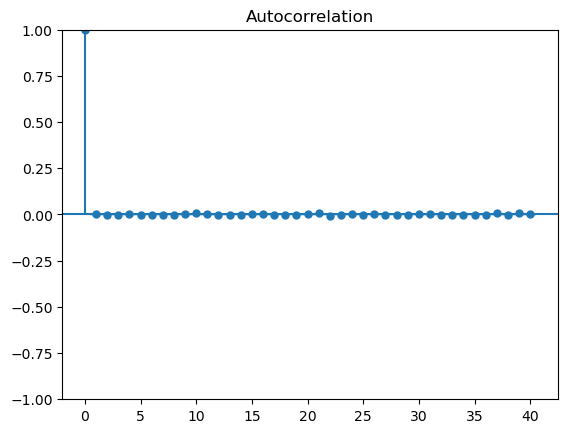

In [35]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

# Assumption 2- Normality of Residuals

H0: the error terms are normally distributed.  
dof for residuals is n-2.  

Jarque–Bera test

In [36]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=403299.2490508901, pvalue=0.0)


/var/folders/bp/xcn4mbr53tscnw24mpsq4m0m0000gn/T/ipykernel_43832/1889532679.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


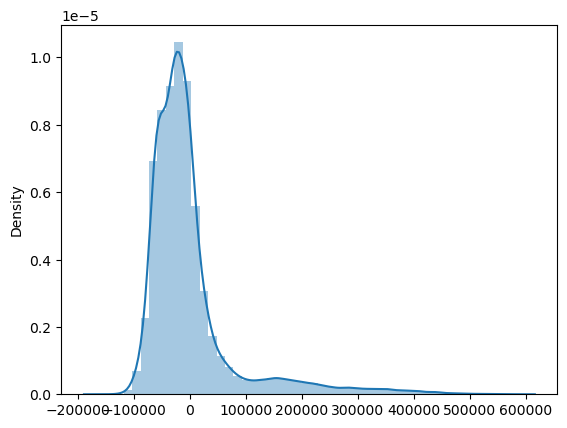

In [37]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

# Asssumption 3 - Linearity of residuals

Rainbow test

In [38]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(0.9793706291034856, 0.9862110538120116)

H0:The data is linear, pvalue > 0.05 failed to reject H0.  
Here we failed to reject H0 so residuals are normally distributed

# Assumption 4 - Homoscedasticity_test

Goldfeld test

In [39]:
import statsmodels.stats.api as sms

In [40]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(0.9708261655058291, 0.9991232619019168, 'increasing')

p-value > 0.05 indicates the presence of heteroscedasticity.

# Assumption 5- NO MULTI COLLINEARITY

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
id,1.000212
claim_amount,1.316536
marital_status,1.028913
vintage,1.012604
gender_Male,1.017865
area_Urban,1.334691
qualification_High School,1.064073
qualification_Others,1.056888
income_5L-10L,1.534187
income_<=2L,1.072336


In [42]:
# Dividing training set to input and output
y_train = dataset['cltv']
X_train_raw = dataset.drop(['cltv'], axis=1)

# Saving test data to X_test_raw
X_test_raw = dataset2

In [43]:
# Using one hot encoder to transform categorical features in training data and test data
ohe = OneHotEncoder()
column_extract_train = ohe.fit_transform(X_train_raw[['gender', 'area', 'qualification','income','num_policies',
                                          'policy','type_of_policy']]).toarray()
column_extract_test = ohe.fit_transform(X_test_raw[['gender', 'area', 'qualification','income','num_policies',
                                          'policy','type_of_policy']]).toarray()

#### Using countplot to visualize the frequency of occurrence of each category in the features

<Axes: xlabel='qualification', ylabel='count'>

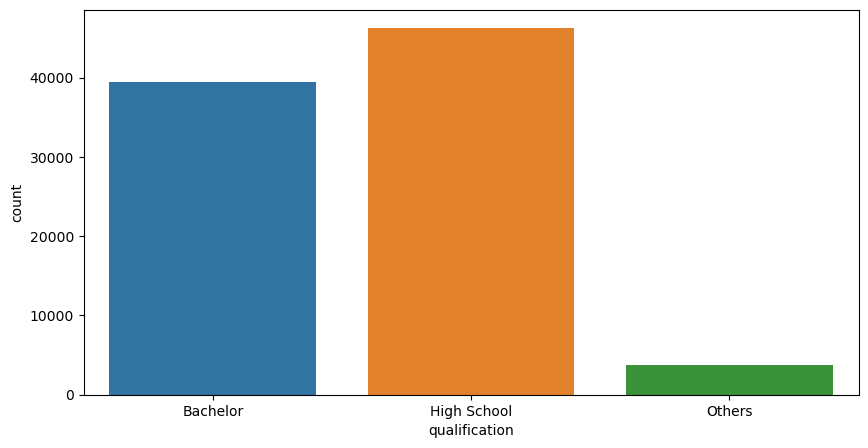

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x="qualification")

<Axes: xlabel='gender', ylabel='count'>

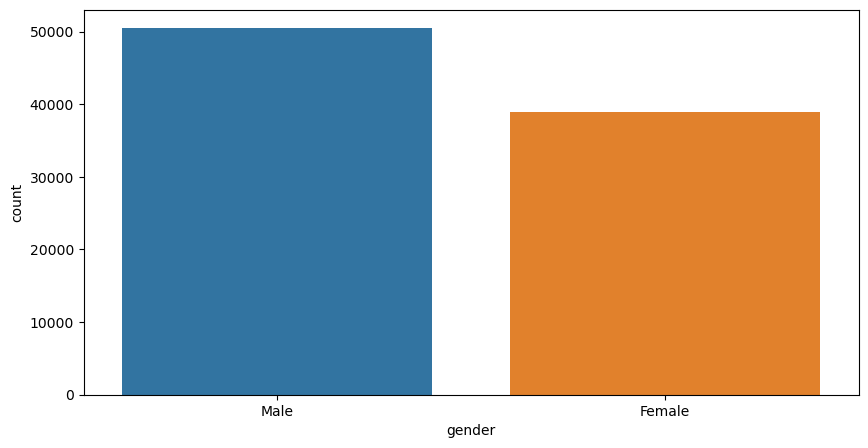

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "gender")

<Axes: xlabel='area', ylabel='count'>

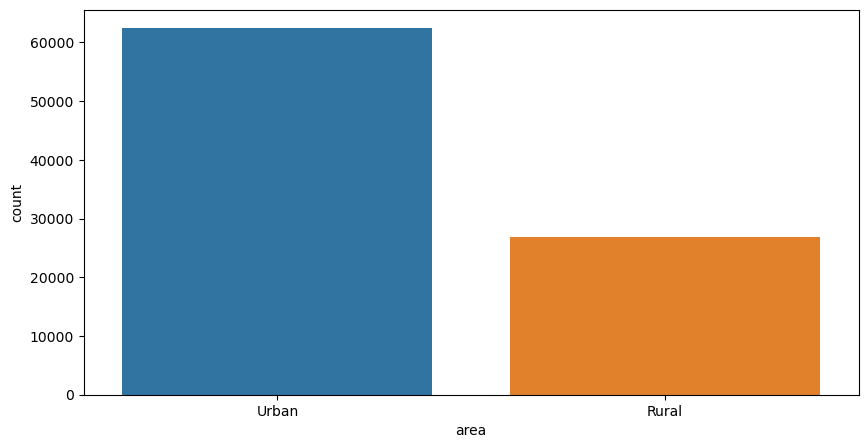

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "area")

<Axes: xlabel='num_policies', ylabel='count'>

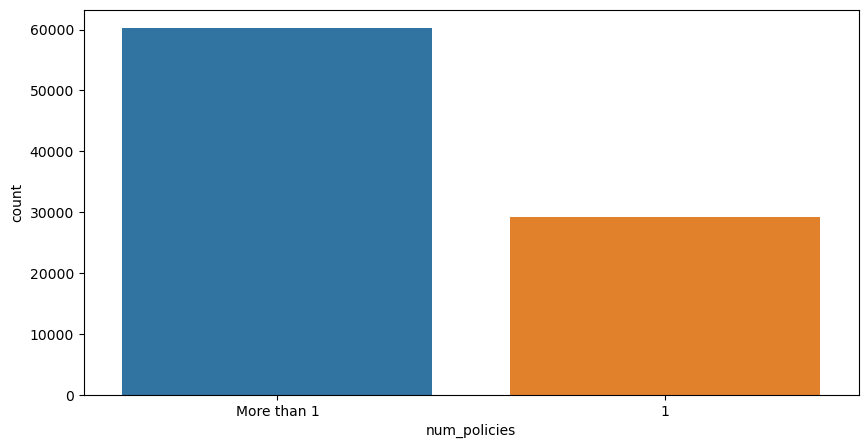

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "num_policies")

<Axes: xlabel='marital_status', ylabel='count'>

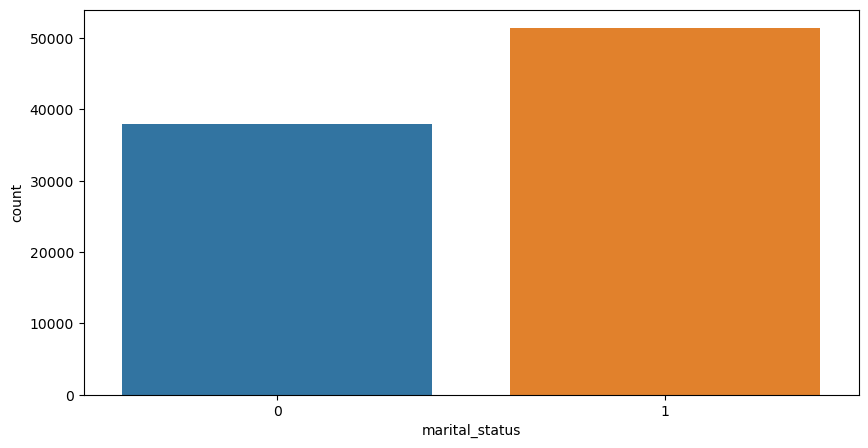

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "marital_status")

<Axes: xlabel='policy', ylabel='count'>

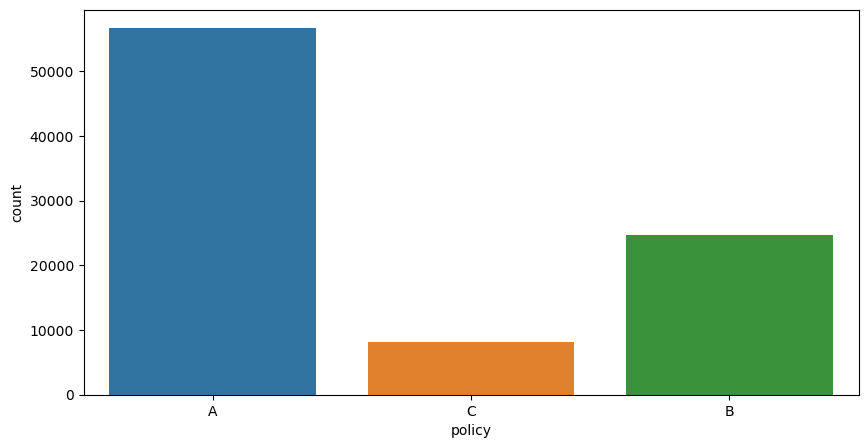

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "policy")

<Axes: xlabel='type_of_policy', ylabel='count'>

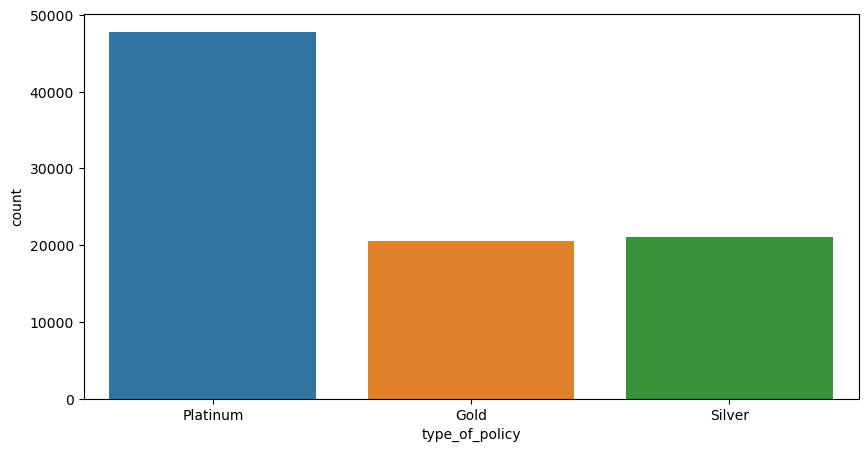

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "type_of_policy")

<Axes: xlabel='vintage', ylabel='count'>

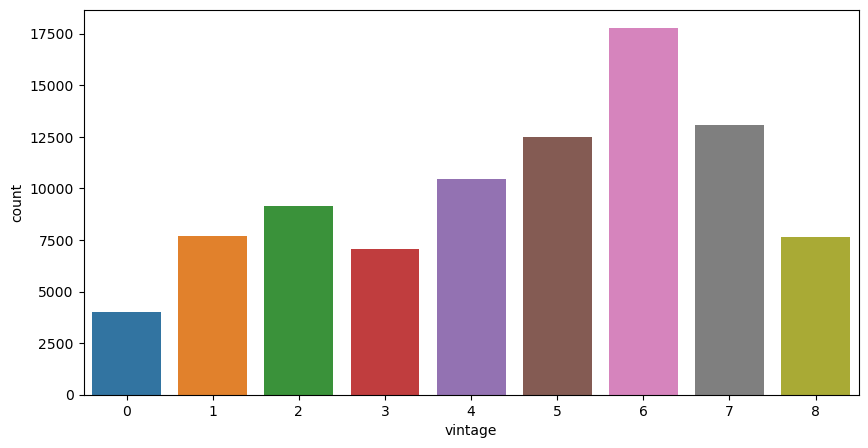

In [51]:
plt.figure(figsize=(10,5))
sns.countplot(dataset, x = "vintage")

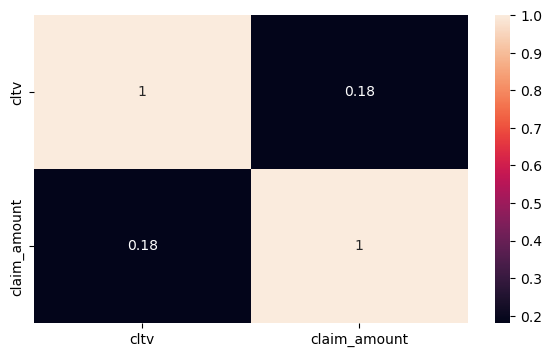

In [52]:
heatmap = dataset[['cltv', 'claim_amount']]
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
plt.show()

The correlation heatmap shows that the correlation between "cltv" and "claim_amount" is very less

#### Extracting labels of columns and making dataframe

In [53]:
labels = ohe.categories_
labels_train = np.hstack(labels)
features_train = pd.DataFrame(column_extract_train, columns = labels_train)
labels_test = np.hstack(labels)
features_test = pd.DataFrame(column_extract_test, columns = labels_test)

#### Concatinating the original data to categorically separated data

In [54]:
X_train_onehotenc = pd.concat([X_train_raw, features_train], axis = 1)
X_test_onehotenc = pd.concat([X_test_raw, features_test], axis = 1)

In [55]:
# X_id = X_train_onehotenc.filter(items=['id'], axis=1)

#### Extracting the relevant columns from the whole dataframe for train set 

In [56]:
X_train = X_train_onehotenc.filter(items=['id', 'marital_status', 'vintage', 'claim_amount', 'Female', 'Male', 
                               'Rural', 'Urban', 'Bachelor', 'High School', 'Others', '2L-5L', 
                               '5L-10L', '<=2L', 'More than 10L', '1', 'More than 1', 'A', 'B', 'C', 
                               'Gold', 'Platinum', 'Silver'], axis=1)
r1 = X_train.corr()
r1.to_csv('Correlation.csv')

#### Extracting the relevant columns from the whole dataframe for test set

In [57]:
X_test = X_test_onehotenc.filter(items=['id', 'marital_status', 'vintage', 'claim_amount', 'Female', 'Male', 
                              'Rural', 'Urban', 'Bachelor', 'High School', 'Others', '2L-5L', 
                              '5L-10L', '<=2L', 'More than 10L', '1', 'More than 1', 'A', 'B', 'C', 
                              'Gold', 'Platinum', 'Silver'], axis=1)

In [58]:
datasetn.rename(columns={'cltv':'cltv'},inplace=True)
X=datasetn.drop(['cltv'],axis=1)
y=datasetn['cltv']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cltv   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:31:53   Log-Likelihood:            -1.1398e+06
No. Observations:               89392   AIC:                         2.280e+06
Df Residuals:                   89375   BIC:                         2.280e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.741e+04   1451.325     32.670      0.000    4.46e+04    5.03e+04
id                           -0.0106      0.011     -0.979      0.328      -0.032       0.011
claim_amount                  2.6948      0.098     27.455      0.000       2.502       2.887
marital_status            -7191.0410    572.733    -12.556      0.000   -8313.593   -6068.489
vintage                     223.6507    122.611      1.824      0.068     -16.665     463.966
gender_Male                2335.0812    567.924      4.112      0.000    1221.956    3448.207
area_Urban                 6301.0331    702.679      8.967      0.000    4923.790    7678.277
qualification_High School  -928.3233    576.107     -1.611      0.107   -2057.488     200.841
qualification_Others      -8060.2204   1431.864     -5.629      0.000   -1.09e+04   -5253.781
income_5L-10L             -5022.7152    702.751     -7.147      0.000   -6400.101   -3645.329
income_<=2L               -4383.8000   2027.855     -2.162      0.031   -8358.376    -409.224
income_More than 10L      -7041.7128    948.402     -7.425      0.000   -8900.572   -5182.854
num_policies_More than 1   6.494e+04    610.541    106.364      0.000    6.37e+04    6.61e+04
policy_B                  -7669.9268    667.310    -11.494      0.000   -8977.848   -6362.005
policy_C                   9659.0243    994.913      9.708      0.000    7709.005    1.16e+04
type_of_policy_Platinum    -660.4207    697.707     -0.947      0.344   -2027.920     707.079
type_of_policy_Silver     -2413.4461    825.307     -2.924      0.003   -4031.041    -795.851
==============================================================================
Omnibus:                    51164.068   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403299.249
Skew:                           2.731   Prob(JB):                         0.00
Kurtosis:                      11.857   Cond. No.                     3.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Random forest method

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
SEED = 0
rfr = RandomForestRegressor(n_estimators=20, max_depth=4, random_state = SEED)

rfr_for_sum = rfr.fit(x_train, y_train)

In [72]:
y_prediction = rfr.predict(x_test)

In [73]:
print(classification_report(y_test,y_prediction))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [61]:
# Extracting the output and storing to variables
cltv = np.array(y_prediction)
id_result = X_test["id"].tolist()

In [62]:
# Saving the output to a .csv ffile
result = pd.DataFrame({'id': id_result, 'cltv': cltv}, columns=['id', 'cltv'])
result.to_csv('Harisri.csv', index = False)